In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r"C:\Users\Shivangi\Downloads\sa2022\train.csv")
df.head(30)

,id,title,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,Fashionable & Comfortable Bellies For Women (...,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,Combo Pack of 4 Casual Shoes Sneakers For Men ...,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,Cilia Mode Leo Sneakers For Women (White),4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,Men Black Sports Sandal,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,Men Green Sports Sandal,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1
5,2692,Women Pink Flats Sandal,4.1,Women,Flipkart,359,499,28.06%,274.0,25.0,153.0,49.0,34.0,15,23,0
6,3236,Women Navy Heels Sandal,4.0,Women,Flipkart,499,999,50.05%,249.0,31.0,130.0,52.0,27.0,9,28,1
7,14633,Women Blue Wedges Sandal,3.9,Women,Flipkart,209,1299,83.91%,121.0,17.0,63.0,25.0,14.0,9,12,0
8,1872,Sneakers For Women (Pink),4.2,Women,Flipkart,549,999,45.05%,191.0,30.0,120.0,25.0,31.0,7,12,1
9,1668,"Men Black, Beige Sandal",4.1,Men,Flipkart,809,899,10.01%,36126.0,5028.0,18688.0,9899.0,3709.0,1272,2558,0


In [3]:
df.drop(["title"], axis=1, inplace=True)
df.head()


,id,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1


In [4]:
df.isnull().values.any()

True

In [5]:
df.isnull().sum()

id              0
Rating          0
maincateg     526
platform        0
price1          0
actprice1       0
Offer %         0
norating1     678
noreviews1    578
star_5f       588
star_4f       539
star_3f       231
star_2f         0
star_1f         0
fulfilled1      0
dtype: int64

In [6]:
df.shape

(15730, 15)

In [7]:
df['maincateg']= df['maincateg'].fillna("Not Specified")
df['norating1']= df['norating1'].fillna(0)
df['noreviews1']= df['noreviews1'].fillna(0)
df['star_5f']= df['star_5f'].fillna(0)
df['star_4f']= df['star_4f'].fillna(0)
df['star_3f']= df['star_3f'].fillna(0)



In [8]:
df.isnull().sum()

id            0
Rating        0
maincateg     0
platform      0
price1        0
actprice1     0
Offer %       0
norating1     0
noreviews1    0
star_5f       0
star_4f       0
star_3f       0
star_2f       0
star_1f       0
fulfilled1    0
dtype: int64

In [9]:
df.head(10)

,id,Rating,maincateg,platform,price1,actprice1,Offer %,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,3.9,Women,Flipkart,698,999,30.13%,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,3.8,Men,Flipkart,999,1999,50.03%,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,4.4,Women,Flipkart,2749,4999,45.01%,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,4.2,Men,Flipkart,518,724,15.85%,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,3.9,Men,Flipkart,1379,2299,40.02%,77.0,3.0,35.0,21.0,7.0,7,7,1
5,2692,4.1,Women,Flipkart,359,499,28.06%,274.0,25.0,153.0,49.0,34.0,15,23,0
6,3236,4.0,Women,Flipkart,499,999,50.05%,249.0,31.0,130.0,52.0,27.0,9,28,1
7,14633,3.9,Women,Flipkart,209,1299,83.91%,121.0,17.0,63.0,25.0,14.0,9,12,0
8,1872,4.2,Women,Flipkart,549,999,45.05%,191.0,30.0,120.0,25.0,31.0,7,12,1
9,1668,4.1,Men,Flipkart,809,899,10.01%,36126.0,5028.0,18688.0,9899.0,3709.0,1272,2558,0


In [10]:
df['maincateg']= df['maincateg'].astype("category")
df['platform']= df['platform'].astype("category")
df['fulfilled1']= df['fulfilled1'].astype("category")


In [11]:
df= df.drop(['Offer %'], axis=1)
df.head()

,id,Rating,maincateg,platform,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,16695,3.9,Women,Flipkart,698,999,38.0,7.0,17.0,9.0,6.0,3,3,0
1,5120,3.8,Men,Flipkart,999,1999,531.0,69.0,264.0,92.0,73.0,29,73,1
2,18391,4.4,Women,Flipkart,2749,4999,17.0,4.0,11.0,3.0,2.0,1,0,1
3,495,4.2,Men,Flipkart,518,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1
4,16408,3.9,Men,Flipkart,1379,2299,77.0,3.0,35.0,21.0,7.0,7,7,1


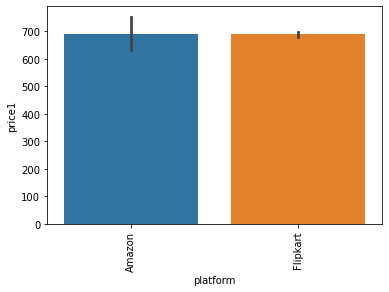

In [12]:
sns.barplot(x=df['platform'], y=df['price1'])

plt.xticks(rotation="vertical")

plt.show()


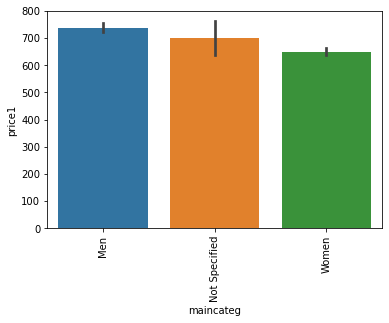

In [13]:
sns.barplot(x=df['maincateg'], y=df['price1'])

plt.xticks(rotation="vertical")

plt.show()


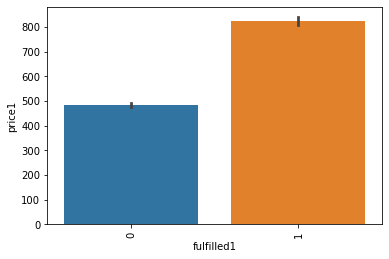

In [14]:
sns.barplot(x=df['fulfilled1'], y=df['price1'])

plt.xticks(rotation="vertical")

plt.show()


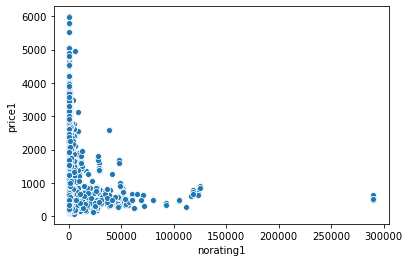

In [15]:
sns.scatterplot(x=df['norating1'],y=df['price1'])


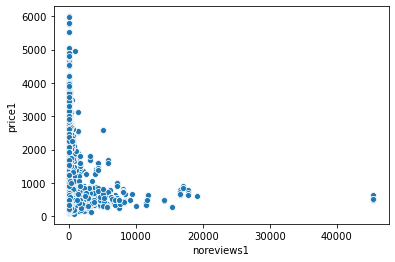

In [16]:
sns.scatterplot(x=df['noreviews1'],y=df['price1'])


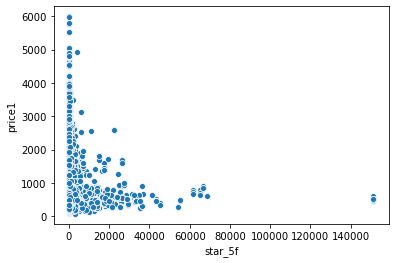

In [17]:
sns.scatterplot(x=df['star_5f'],y=df['price1'])


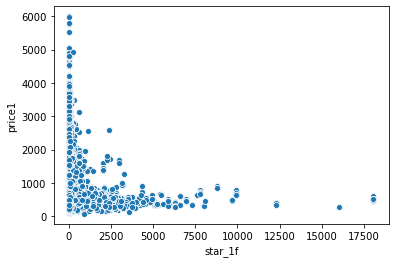

In [18]:
sns.scatterplot(x=df['star_1f'],y=df['price1'])


In [19]:
mainCateg= df.maincateg
platform= df.platform

df= pd.get_dummies(df, columns=['maincateg', 'platform'])

df.shape
df.head()

,id,Rating,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,maincateg_Men,maincateg_Not Specified,maincateg_Women,platform_Amazon,platform_Flipkart
0,16695,3.9,698,999,38.0,7.0,17.0,9.0,6.0,3,3,0,0,0,1,0,1
1,5120,3.8,999,1999,531.0,69.0,264.0,92.0,73.0,29,73,1,1,0,0,0,1
2,18391,4.4,2749,4999,17.0,4.0,11.0,3.0,2.0,1,0,1,0,0,1,0,1
3,495,4.2,518,724,46413.0,6229.0,1045.0,12416.0,5352.0,701,4595,1,1,0,0,0,1
4,16408,3.9,1379,2299,77.0,3.0,35.0,21.0,7.0,7,7,1,1,0,0,0,1


In [20]:
X= df[['Rating', 'actprice1', 'norating1', 'noreviews1', 'star_5f', 'star_3f', 'star_2f', 'star_4f', 'star_1f', 'fulfilled1', 'maincateg_Men', 'maincateg_Not Specified', 'maincateg_Women', 'platform_Amazon', 'platform_Flipkart']]
y= df[['price1']]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=2)

X_train.dtypes

Rating                      float64
actprice1                     int64
norating1                   float64
noreviews1                  float64
star_5f                     float64
star_3f                     float64
star_2f                       int64
star_4f                     float64
star_1f                       int64
fulfilled1                 category
maincateg_Men                 uint8
maincateg_Not Specified       uint8
maincateg_Women               uint8
platform_Amazon               uint8
platform_Flipkart             uint8
dtype: object

In [22]:
df.describe()

,id,Rating,price1,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,maincateg_Men,maincateg_Not Specified,maincateg_Women,platform_Amazon,platform_Flipkart
count,15730.000000,15730.000000,15730.000000,15730.000000,15730.000000,15730.000000,15730.000000,15730.000000,15730.000000,15730.000000,15730.000000,15730.000000,15730.000000,15730.000000,15730.000000,15730.000000
mean,10479.541577,4.012873,688.070693,1369.286777,2925.868404,408.397266,1525.981945,633.447616,352.014177,155.085188,275.500572,0.408328,0.033439,0.558233,0.021678,0.978322
std,6080.166276,0.298440,649.409586,1240.900227,11605.447095,1737.269600,6068.365264,2808.914550,1392.574955,558.650254,958.589075,0.491540,0.179786,0.496613,0.145636,0.145636
min,3.000000,0.000000,69.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5212.000000,3.900000,349.000000,699.000000,50.000000,7.000000,24.000000,9.250000,6.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,10458.500000,4.000000,474.000000,999.000000,267.000000,38.000000,135.000000,53.000000,32.000000,17.000000,30.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,15766.750000,4.200000,699.000000,1299.000000,1379.250000,198.000000,722.750000,279.000000,167.000000,77.000000,140.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,20973.000000,5.000000,5998.000000,13499.000000,289973.000000,45448.000000,151193.000000,74037.000000,34978.000000,11705.000000,18060.000000,1.000000,1.000000,1.000000,1.000000,1.000000


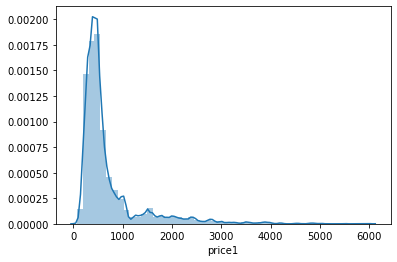

In [23]:
sns.distplot(df['price1'])
plt.show()

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform (X_test)

In [26]:
reg = LinearRegression(fit_intercept=True, normalize= True, copy_X=True, n_jobs=1).fit(X_train, y_train)
reg.score(X_train, y_train)


0.8034830276874376

In [27]:
y_pred= reg.predict(X_test)

In [28]:
r2_score(y_test, y_pred)

0.794667177998781

In [29]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

regressor = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)
regressor.fit(X_train,y_train)

y_pred_sv = regressor.predict(X_test)

r2_score(y_test, y_pred_sv)





0.7672854407292934

In [30]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

rr = Ridge(alpha=5)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

286.666139718026
0.8034823290700513
300.8822053988968
0.7947360557508059


In [31]:
model_lasso = Lasso(alpha= 0.8)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 

print(r2_score(y_test, pred_test_lasso))
print(pred_test_lasso)

286.838333562527
0.8032461707536014
300.4406260508706
0.7953381106712193
[560.092433   382.37672423 344.19481132 ... 474.47049067 500.25572066
 260.15057848]


In [32]:
model_enet = ElasticNet(alpha = 0.0008)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

286.66622460035705
0.8034822126916017
300.877064906875
0.7947430694500897


In [33]:
data= pd.read_csv(r"C:\Users\Shivangi\Downloads\sa2022\test.csv")
data.head(30)

,id,title,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,Casuals For Men (Blue),3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,Women Black Flats Sandal,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,Women Gold Wedges Sandal,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,Men's Height Increasing High Heel Formal Party...,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,Loafers For Men (Tan),3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0
5,11159,Canvas Shoes For Men (Black),3.9,Men,Flipkart,999,541,72,281.0,104,69,17,70.0,0
6,10680,Combo Pack Of 2 Casual Shoes Slip On Sneakers ...,3.9,Men,Flipkart,2400,824,105,386.0,199,106,61,72.0,1
7,6433,ARYA - DIFFERENT EDGE Bellies For Women (Purple),4.2,Women,Flipkart,4299,166,24,94.0,39,12,6,15.0,1
8,2794,"Latest Collection, Comfortable & Fashionable B...",3.9,Women,Flipkart,499,1816,218,899.0,360,239,113,208.0,0
9,11579,MOCCASSIN Slip On For Men (Black),3.8,Men,Flipkart,2299,3066,392,1304.0,803,462,189,308.0,1


In [34]:
data.drop(["title"], axis=1, inplace=True)
data.head()

,id,Rating,maincateg,platform,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1
0,2242,3.8,Men,Flipkart,999,27928,3543,14238.0,4295,3457,1962,3976.0,1
1,20532,3.9,Women,Flipkart,499,3015,404,1458.0,657,397,182,321.0,1
2,10648,3.9,Women,Flipkart,999,449,52,229.0,70,71,33,46.0,1
3,20677,3.9,Men,Flipkart,2999,290,40,141.0,51,49,17,32.0,1
4,12593,3.9,Men,Flipkart,999,2423,326,1265.0,414,293,143,308.0,0


In [35]:
data['maincateg']= data['maincateg'].fillna("Not Specified")
data['norating1']= data['norating1'].fillna(0)
data['noreviews1']= data['noreviews1'].fillna(0)
data['star_5f']= data['star_5f'].fillna(0)
data['star_4f']= data['star_4f'].fillna(0)
data['star_3f']= data['star_3f'].fillna(0)
data['star_1f']= data['star_1f'].fillna(0)
data['Rating']= data['Rating'].fillna(0)


In [36]:
data['maincateg']= data['maincateg'].astype("category")
data['platform']= data['platform'].astype("category")
data['fulfilled1']= data['fulfilled1'].astype("category")


In [37]:
mainCateg= data.maincateg
platform= data.platform

data= pd.get_dummies(data, columns=['maincateg', 'platform'])

data.shape
data.head()

,id,Rating,actprice1,norating1,noreviews1,star_5f,star_4f,star_3f,star_2f,star_1f,fulfilled1,maincateg_Men,maincateg_Not Specified,maincateg_Women,platform_Amazon,platform_Flipkart
0,2242,3.8,999,27928,3543,14238.0,4295,3457,1962,3976.0,1,1,0,0,0,1
1,20532,3.9,499,3015,404,1458.0,657,397,182,321.0,1,0,0,1,0,1
2,10648,3.9,999,449,52,229.0,70,71,33,46.0,1,0,0,1,0,1
3,20677,3.9,2999,290,40,141.0,51,49,17,32.0,1,1,0,0,0,1
4,12593,3.9,999,2423,326,1265.0,414,293,143,308.0,0,1,0,0,0,1


In [38]:
X_data= data[['Rating', 'actprice1', 'norating1', 'noreviews1', 'star_5f', 'star_3f', 'star_2f', 'star_4f', 'star_1f', 'fulfilled1', 'maincateg_Men', 'maincateg_Not Specified', 'maincateg_Women', 'platform_Amazon', 'platform_Flipkart']]
X_data.head()

,Rating,actprice1,norating1,noreviews1,star_5f,star_3f,star_2f,star_4f,star_1f,fulfilled1,maincateg_Men,maincateg_Not Specified,maincateg_Women,platform_Amazon,platform_Flipkart
0,3.8,999,27928,3543,14238.0,3457,1962,4295,3976.0,1,1,0,0,0,1
1,3.9,499,3015,404,1458.0,397,182,657,321.0,1,0,0,1,0,1
2,3.9,999,449,52,229.0,71,33,70,46.0,1,0,0,1,0,1
3,3.9,2999,290,40,141.0,49,17,51,32.0,1,1,0,0,0,1
4,3.9,999,2423,326,1265.0,293,143,414,308.0,0,1,0,0,0,1


In [39]:
data.isnull().values.any()

False

In [40]:
data.isnull().sum()

id                         0
Rating                     0
actprice1                  0
norating1                  0
noreviews1                 0
star_5f                    0
star_4f                    0
star_3f                    0
star_2f                    0
star_1f                    0
fulfilled1                 0
maincateg_Men              0
maincateg_Not Specified    0
maincateg_Women            0
platform_Amazon            0
platform_Flipkart          0
dtype: int64

In [41]:
predictions= model_lasso.predict(X_data)

In [42]:
print(predictions)
print(len(predictions))

[747449.2606428434 308042.20142294635 560442.3155492786 ...
 569105.545674163 321052.01510236954 418389.28307109897]
5244


In [43]:
model_lasso.predict(X_data)

array([747449.2606428434, 308042.20142294635, 560442.3155492786, ...,
       569105.545674163, 321052.01510236954, 418389.28307109897],
      dtype=object)

In [44]:
for i in predictions:
    print(round(i/1000))

747
308
560
1674
577
563
1346
2398
295
1315
192
687
561
630
1110
563
2234
320
338
669
449
580
3901
250
687
3067
793
2566
1106
196
818
381
279
559
558
561
757
452
566
282
570
1289
494
475
2786
5015
663
569
558
557
449
2797
554
2228
335
570
559
1675
1675
561
614
2827
893
447
391
245
224
497
491
355
560
283
559
390
390
563
560
560
559
837
839
836
289
615
502
3511
559
192
296
591
1393
578
588
1114
559
1827
727
337
488
525
638
1114
629
1283
559
1115
2674
3343
1391
557
279
560
895
557
569
567
578
2232
289
415
280
562
573
845
374
621
532
836
549
145
842
628
679
194
568
565
558
280
501
583
281
447
341
567
561
677
459
280
2790
559
559
387
593
561
565
423
612
1158
573
562
581
557
446
864
447
446
335
762
2387
557
3343
580
167
1115
508
723
558
279
506
841
449
310
3344
1746
568
558
2229
663
558
557
311
253
440
792
948
1187
558
559
421
280
334
447
280
558
838
306
3932
1116
1177
446
576
586
837
367
1533
282
710
558
563
725
727
560
557
836
558
557
337
170
539
381
281
849
561
560
304
279
4177
838
306
3

In [45]:
pred_test_enet_submission= model_enet.predict(X_data)

In [46]:
print(pred_test_enet_submission)

[936298.9075063308 327376.65541774064 562394.4254248582 ...
 576924.9006186676 350869.09451434546 422275.2872639255]


In [47]:
for i in pred_test_enet_submission:
    print(round(i/1000))

936
327
562
1675
595
568
1351
2400
307
1332
214
769
562
679
1110
567
2239
424
340
669
451
599
3902
243
769
3069
805
2571
1537
196
845
455
280
560
558
558
779
456
570
285
577
1296
496
477
2786
5017
809
576
560
558
451
2809
545
2229
335
578
560
1678
1678
563
615
2833
894
449
392
256
225
510
637
373
562
286
560
390
420
567
562
561
561
837
840
837
300
618
503
3512
560
214
284
626
1393
587
604
1115
560
1962
729
338
499
527
684
1115
631
1283
559
1116
2676
3344
1391
558
279
561
897
557
570
574
591
2237
295
523
280
565
585
855
382
680
532
836
550
147
847
685
767
196
577
570
558
281
501
601
283
448
347
574
563
763
477
284
2794
560
559
401
623
568
571
426
685
1214
601
565
601
553
447
1119
448
442
335
789
2387
558
3343
619
169
1116
512
723
558
280
508
880
451
318
3346
1749
577
559
2229
809
559
558
328
255
501
793
948
1603
558
560
422
281
339
448
280
559
840
299
6013
1118
1181
446
591
607
838
455
1534
285
718
558
568
726
728
561
558
837
560
557
339
172
617
455
283
856
570
562
321
279
4178
839
299
